# Python Lab Activity: Least Squares Solution for a Simple 2D Regression Problem

In this lab activity, you will implement the least squares solution for a synthetic 2D regression problem. You will generate synthetic data using known coefficients, add noise to simulate real-world scenarios, and use the least squares approach to estimate the weights.

---

## **Activity Description**

In this lab:
1. We will create synthetic 2D data based on a linear regression model:  
$$y = w_0 + w_1x_1 + w_2x_2 + \epsilon$$  
   where $w_0, w_1, w_2$ are known weights, and \( \epsilon \) is random noise.
2. Implement the least squares solution formula:  
$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$
3. Apply this solution to the synthetic data and compare the estimated weights with the original weights.

True Weights (w_true): [ 3.   2.  -1.5]
Estimated Weights (w_estimated): [ 2.91061004  1.96582747 -1.42806886]


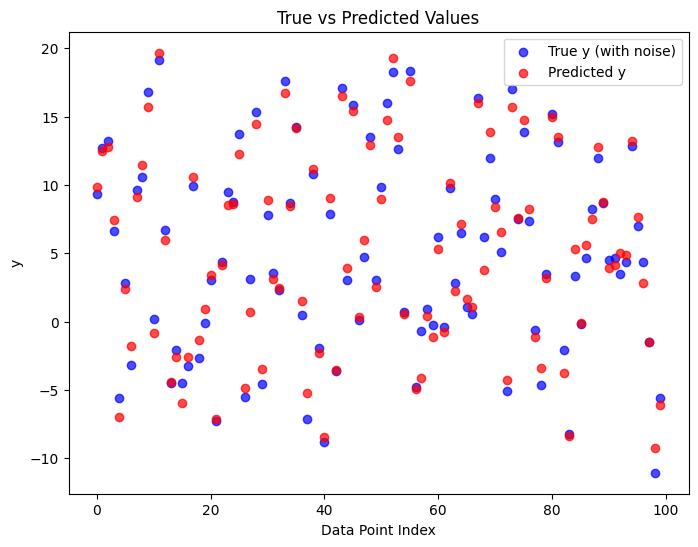

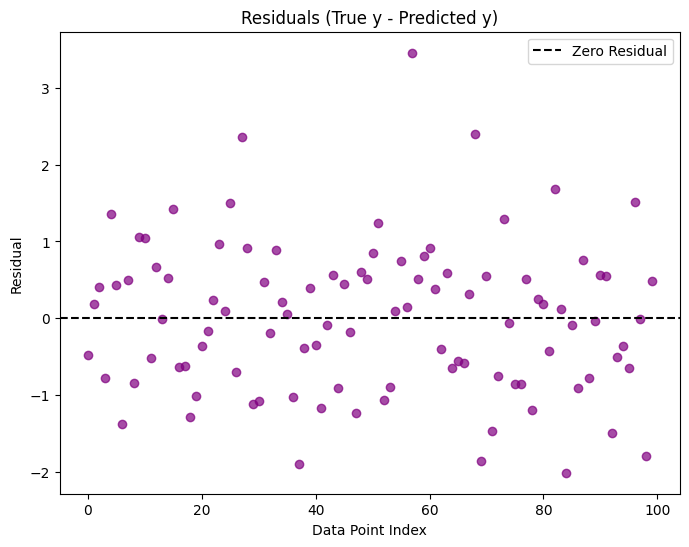

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)  # For reproducibility
N = 100  # Number of data points

# True coefficients
w_true = np.array([3.0, 2.0, -1.5])  # [w0, w1, w2]

# Generate random input features
x1 = np.random.rand(N) * 10  # Feature 1
x2 = np.random.rand(N) * 10  # Feature 2

# Generate target values with noise
noise = np.random.randn(N)  # Random noise
y = w_true[0] + w_true[1] * x1 + w_true[2] * x2 + noise  # Linear model with noise

# Prepare the design matrix (X) by adding a column of ones for the bias term
X = np.column_stack((np.ones(N), x1, x2))  # Shape: (N, 3)

# Step 2: Implement Least Squares Solution
# Calculate weights using the formula: w = (X^T X)^(-1) X^T y
X_transpose = X.T
w_estimated = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

# Step 3: Compare True vs Estimated Weights
print("True Weights (w_true):", w_true)
print("Estimated Weights (w_estimated):", w_estimated)

# Step 4: Visualize the Results
# Generate predicted values using the estimated weights
y_pred = X @ w_estimated

# Plot the true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(N), y, color="blue", label="True y (with noise)", alpha=0.7)
plt.scatter(range(N), y_pred, color="red", label="Predicted y", alpha=0.7)
plt.title("True vs Predicted Values")
plt.xlabel("Data Point Index")
plt.ylabel("y")
plt.legend()
#plt.grid()
plt.show()

# Step 5: Visualize Residuals
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(range(N), residuals, color="purple", alpha=0.7)
plt.axhline(0, color="black", linestyle="--", label="Zero Residual")
plt.title("Residuals (True y - Predicted y)")
plt.xlabel("Data Point Index")
plt.ylabel("Residual")
plt.legend()
#plt.grid()
plt.show()

### **Expected Output**
1. The estimated weights (\( w_{\text{estimated}} \)) should be close to the true weights (\( w_{\text{true}} \)).
2. The first plot should show the true \( y \) values (with noise) and the predicted \( y \) values aligning closely.
3. The residuals plot should have values centered around 0, with no significant systematic pattern.

---

This lab allows you to appreciate how the least squares method works and how noise in the data impacts the accuracy of weight estimation.